# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-warning">
    
# <span style=" color:red">Store Sharing Project!

Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>

<div class="alert alert-block alert-info alert">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [9]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
df.shape

(17414, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [16]:
# distribution of missing data reviewed. no missing data found.
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [18]:
#duplicate data checked. no duplicate data found.
df.duplicated().sum()

0

In [20]:
round (df.describe(exclude = 'object'), 2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00
mean,1143.10,12.47,11.52,72.32,15.91,2.72,0.02,0.29,1.49
std,1085.11,5.57,6.62,14.31,7.89,2.34,0.15,0.45,1.12
min,0.00,-1.50,-6.00,20.50,0.00,1.00,0.00,0.00,0.00
25%,257.00,8.00,6.00,63.00,10.00,1.00,0.00,0.00,0.00
50%,844.00,12.50,12.50,74.50,15.00,2.00,0.00,0.00,1.00
75%,1671.75,16.00,16.00,83.00,20.50,3.00,0.00,1.00,2.00
max,7860.00,34.00,34.00,100.00,56.50,26.00,1.00,1.00,3.00


In [22]:
round (df.describe(exclude = ['float','int64']), 2)

,timestamp
count,17414
unique,17414
top,2015-01-04 00:00:00
freq,1


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

- Look at the data type of each variable, transform timestamp in type, and set it as index.

- Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [25]:
df["weather_code"].value_counts()


weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [27]:
mapping = {
    1: "Clear",
    2: "Scattered Clouds / Few Clouds",
    3: "Broken Clouds",
    4: "Cloudy",
    7: "Rain/ Light Rain",
    10: "Rain With Thunderstorm",
    26: "Snowfall",
    94: "Freezing Fog"
}

df['weather_code'] = df['weather_code'].replace(mapping)
df['weather_code']=df['weather_code'].astype(str)

In [29]:
df["is_holiday"].value_counts()

is_holiday
0.0    17030
1.0      384
Name: count, dtype: int64

In [31]:
df['is_holiday']=df['is_holiday'].replace(0,"No Holiday")
df['is_holiday']=df['is_holiday'].replace(1,"Holiday")
df['is_holiday']=df['is_holiday'].astype(str)

In [33]:
df["is_weekend"].value_counts()

is_weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

In [35]:
df['is_weekend']=df['is_weekend'].replace(0,"Weekdays")
df['is_weekend']=df['is_weekend'].replace(1,"Weekend")
df['is_weekend']=df['is_weekend'].astype(str)

In [37]:
df["season"].value_counts()


season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [39]:
mapping = {
    0: "Spring",
    1: "Summer",
    2: "Fall",
    3: "Winter",
}

df['season'] = df['season'].replace(mapping)
df['season']=df['season'].astype(str)

In [41]:
round (df.describe(exclude = ['float','int64']), 2)

,timestamp,weather_code,is_holiday,is_weekend,season
count,17414,17414,17414,17414,17414
unique,17414,7,2,2,4
top,2015-01-04 00:00:00,Clear,No Holiday,Weekdays,Spring
freq,1,6150,17030,12444,4394


In [43]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [45]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,No Holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No Holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No Holiday,Weekend,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No Holiday,Weekend,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No Holiday,Weekend,Winter


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

<div class="alert alert-block alert-success">

### <span style=" color:red"> Look at the data type of each variable, transform timestamp in type, and set it as index.

In [49]:
# set timestamp column as index
#df.set_index('timestamp', inplace=True)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  object        
 8   is_weekend    17414 non-null  object        
 9   season        17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.3+ MB


<div class="alert alert-block alert-success">

### <span style=" color:red"> Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

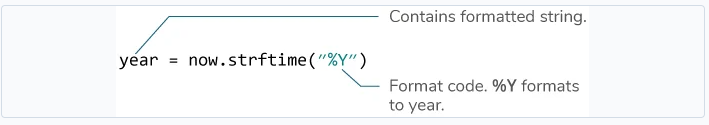

In [55]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_of_month'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['day_name'] = df['timestamp'].dt.day_name()    # Day names for easier readability
df['weekday_name'] = df['timestamp'].dt.strftime('%A')  # Full weekday name
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [57]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,day_name,weekday_name,hour,minute,second
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,1,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,2,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,3,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,4,0,0


In [59]:
# Add season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season2'] = df['month'].apply(get_season)

In [61]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,day_name,weekday_name,hour,minute,second,season2
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,0,0,0,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,1,0,0,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,2,0,0,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,3,0,0,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No Holiday,Weekend,Winter,2015,1,4,6,Sunday,Sunday,4,0,0,Winter


<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the correlation with a heatmap

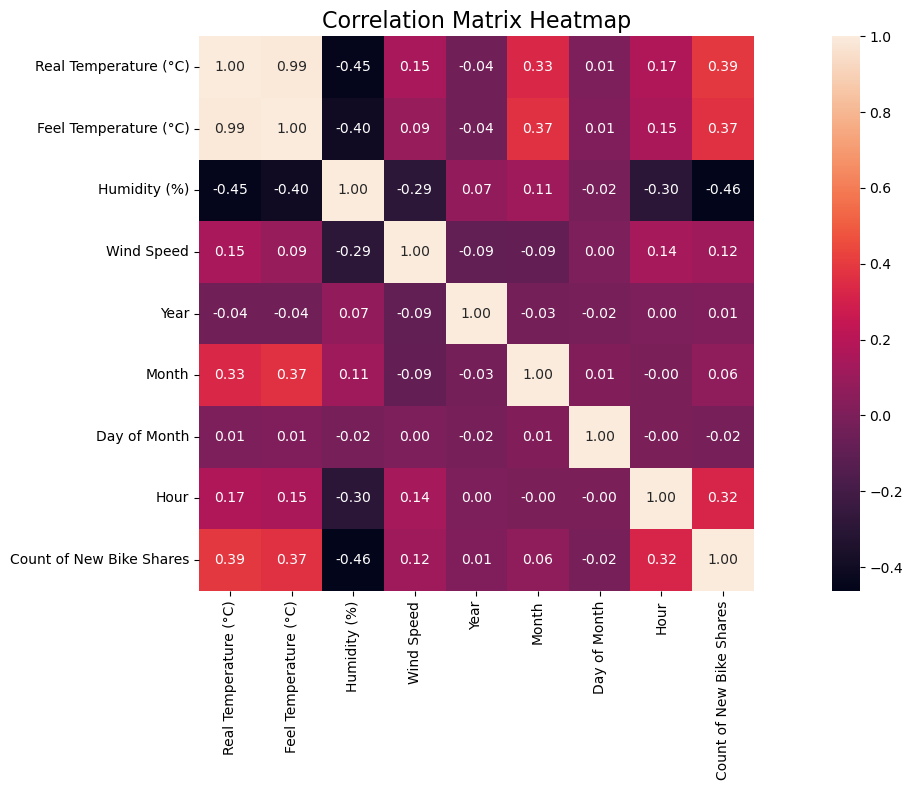

In [64]:
# List of columns to analyze
columns = ['t1', 't2', 'hum', 'wind_speed','year','month','day_of_month', 'hour']

column_names = {
    'cnt': 'Count of New Bike Shares',
    't1': 'Real Temperature (°C)',
    't2': 'Feel Temperature (°C)',
    'hum': 'Humidity (%)',
    'wind_speed': 'Wind Speed',
    'year': 'Year',
    'month': 'Month',
    'day_of_month': 'Day of Month',
    'hour': 'Hour'
}
# Compute correlation matrix
correlation_matrix = df[columns + ['cnt']].corr()

# Rename the correlation matrix index and columns
correlation_matrix.rename(index=column_names, columns=column_names, inplace=True)

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,        # Show correlation coefficients on the heatmap
    fmt=".2f",         # Format the annotations to 2 decimal places
    cmap="rocket",   # Color map for better visualization
    cbar=True,         # Display color bar
    square=True        # Make the heatmap cells square)
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show();

Count of New Bike Shares has a moderate positive correlation with Real Temperature and Feel Temperature (0.39 and 0.37). There is a negative correlation between Humidity (%) and Count of New Bike Shares (-0.46), meaning that as humidity increases, the number of bike shares may decrease.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the correlation of the target variable and the other features with barplot

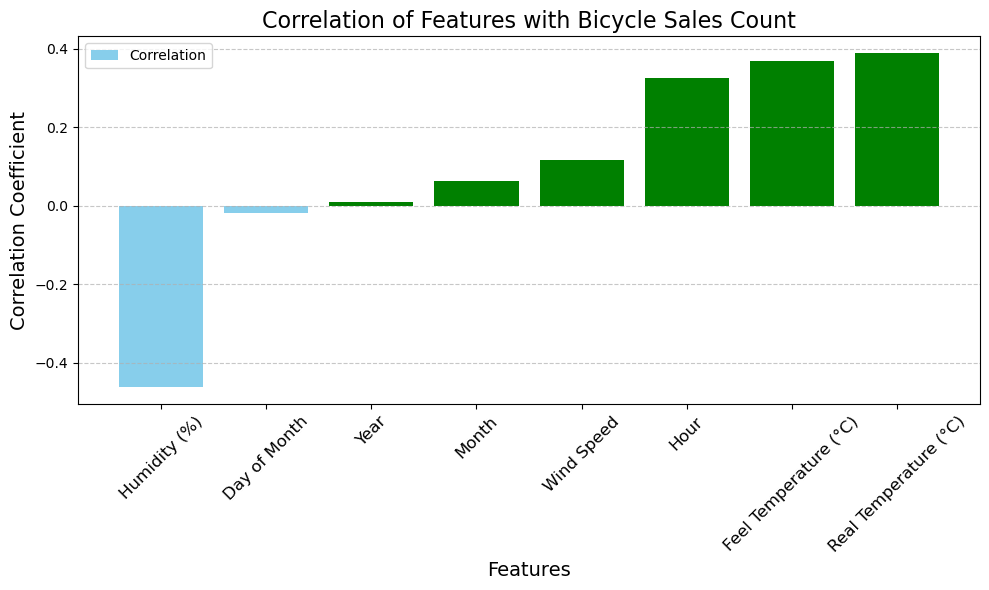

In [68]:
# List of columns to analyze
columns = ['t1', 't2', 'hum', 'wind_speed', 'year', 'month', 'day_of_month', 'hour']

column_names = {
    'cnt': 'Count of New Bike Shares',
    't1': 'Real Temperature (°C)',
    't2': 'Feel Temperature (°C)',
    'hum': 'Humidity (%)',
    'wind_speed': 'Wind Speed',
    'year': 'Year',
    'month': 'Month',
    'day_of_month': 'Day of Month',
    'hour': 'Hour'
}


# Compute correlation matrix and filter for 'cnt'
correlations = df[columns + ['cnt']].corr()['cnt'].drop('cnt')

# Rename index for the bar plot
correlations.index = [column_names[col] for col in correlations.index]

# Sort correlations for better visualization
correlations = correlations.sort_values()
# Korelasyon renkleri: Negatif için kırmızı, pozitif için yeşil
colors = ['skyblue' if val < 0 else 'green' for val in correlations]
#Plotting the correlations with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(correlations.index, correlations.values, color=colors)
plt.title('Correlation of Features with Bicycle Sales Count', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(['Correlation'], loc='best')
plt.show();

This figure shows a correlation bar chart. The graph shows the correlation coefficients between Count of New Bike Shares and other variables. Real Temperature (°C) and Feel Temperature (°C) have the strongest positive correlation. This shows that as the temperature increases, so does cycling. Hour is also positively correlated, meaning that cycling increases at certain times of the day. Humidity (%) has the strongest negative correlation with the number of bike shares. This indicates that cycling decreases on days when the weather is humid.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares over time use lineplot.

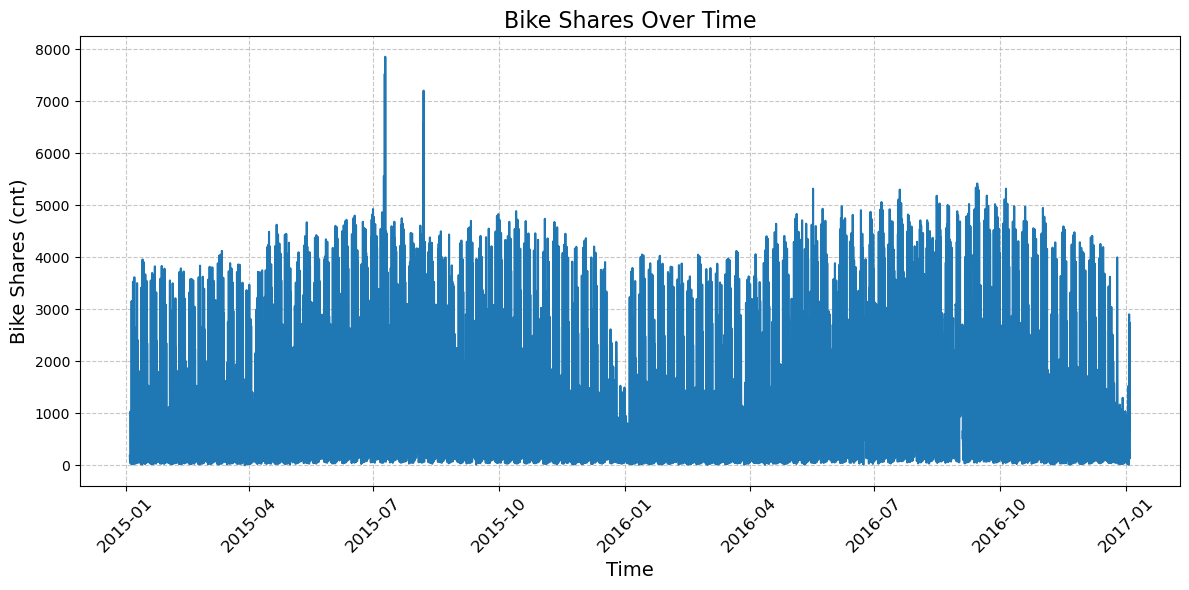

In [74]:
# Set the timestamp as the index for easier time-series plotting
df.set_index('timestamp', inplace=True)

# Plot bike shares over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='cnt')
plt.title('Bike Shares Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph shows fluctuations in the number of bike shares over time. Seasonal or periodic changes can be noticed. In mid-2015 there is a sharp increase, possibly due to a special event, weather change or a change in the system. Towards the end of 2016 there is a drop in the number of bike shares

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

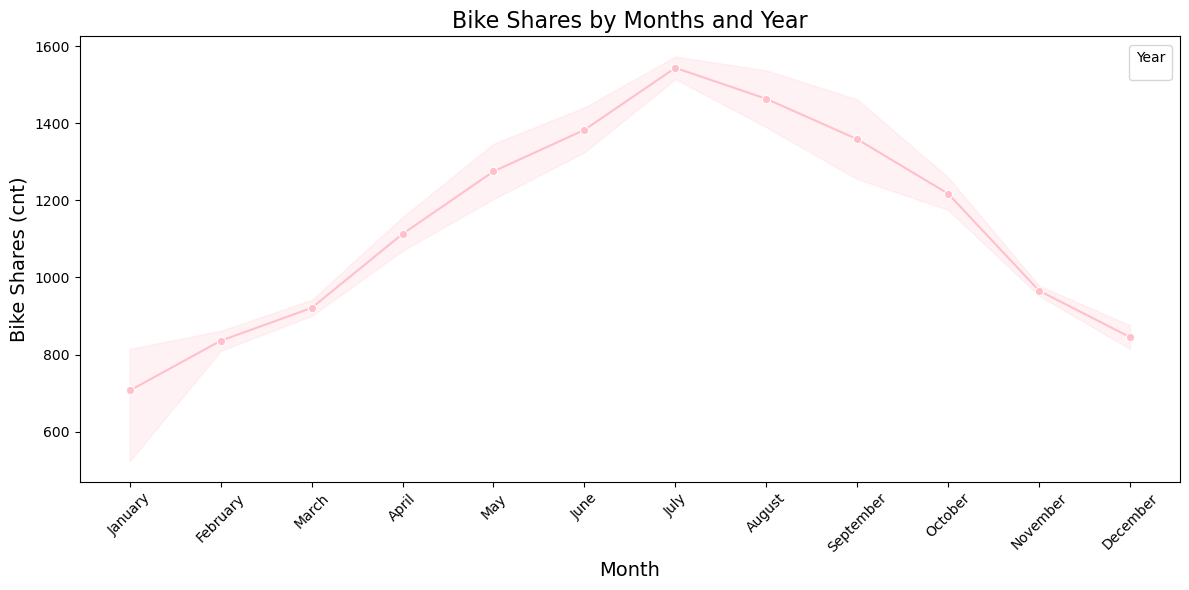

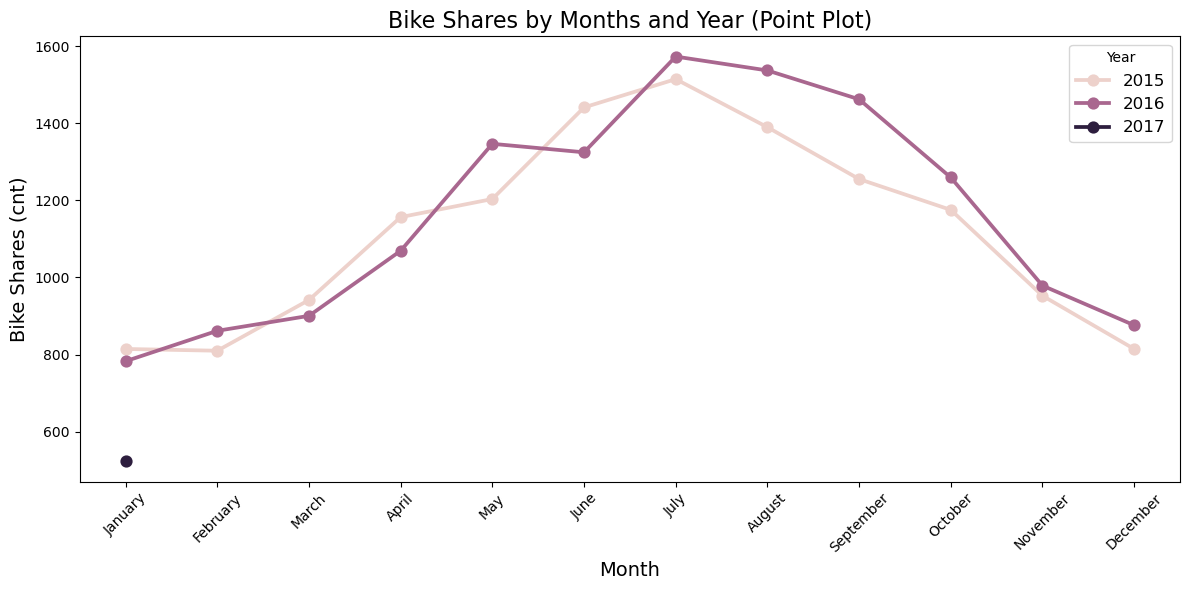

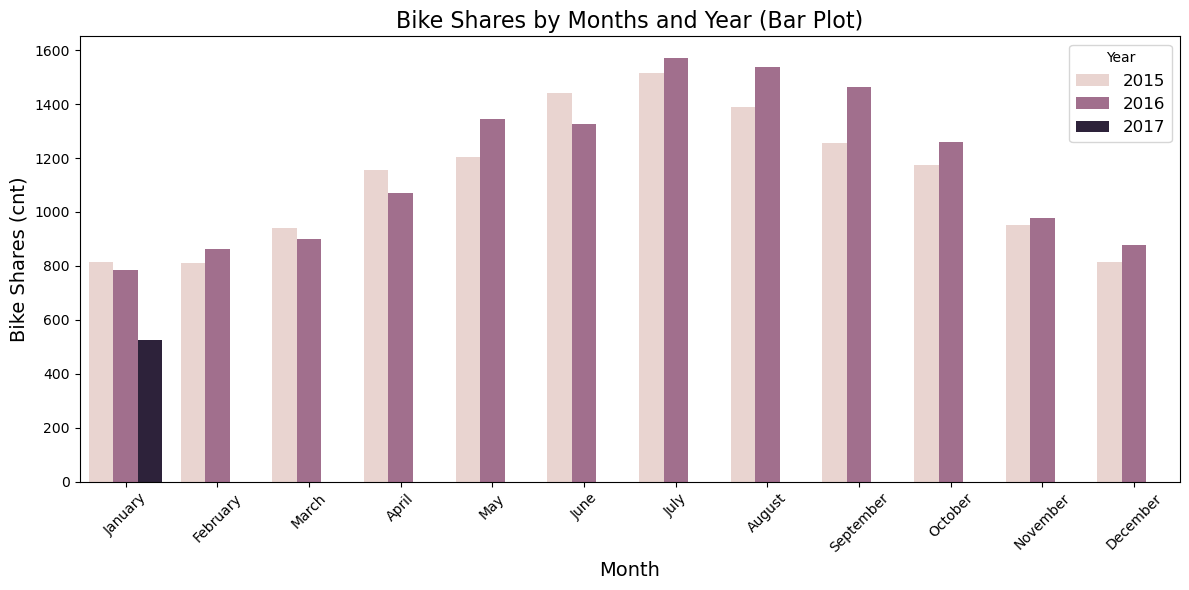

In [78]:
# Group by year and month and calculate the average bike shares for each combination
monthly_data = df.groupby(['year', 'month'])['cnt'].mean().reset_index()

# Convert the month number to a readable name
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: pd.to_datetime(f'{x}', format='%m').strftime('%B'))

# Sort months for proper plotting
monthly_data = monthly_data.sort_values(by=['year', 'month'])

### Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='month_name', y='cnt', marker='o', color="pink")
plt.title('Bike Shares by Months and Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year', fontsize=12)
plt.tight_layout()
plt.show()

### Point Plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=monthly_data, x='month_name', y='cnt', hue='year', markers='o', linestyles='-')
plt.title('Bike Shares by Months and Year (Point Plot)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year', fontsize=12)
plt.tight_layout()
plt.show()

### Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='month_name', y='cnt', hue='year', ci=None)
plt.title('Bike Shares by Months and Year (Bar Plot)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year', fontsize=12)
plt.tight_layout()
plt.show()

The lines for 2015, 2016 are almost the same. In general, there is a trend of peaking in the summer and declining in the winter. Bicycle use peaks in the summer months (June-July-August). In the fall and winter months (October-March), the number of bike shares decreases.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by hours on (holidays, weekend, season).
</span>

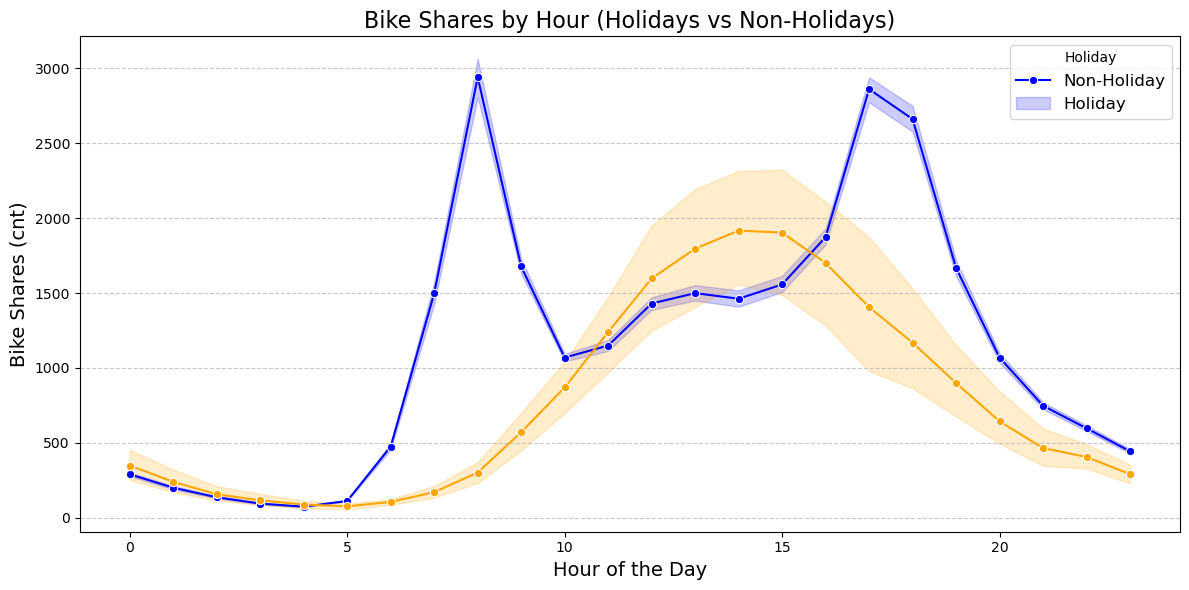

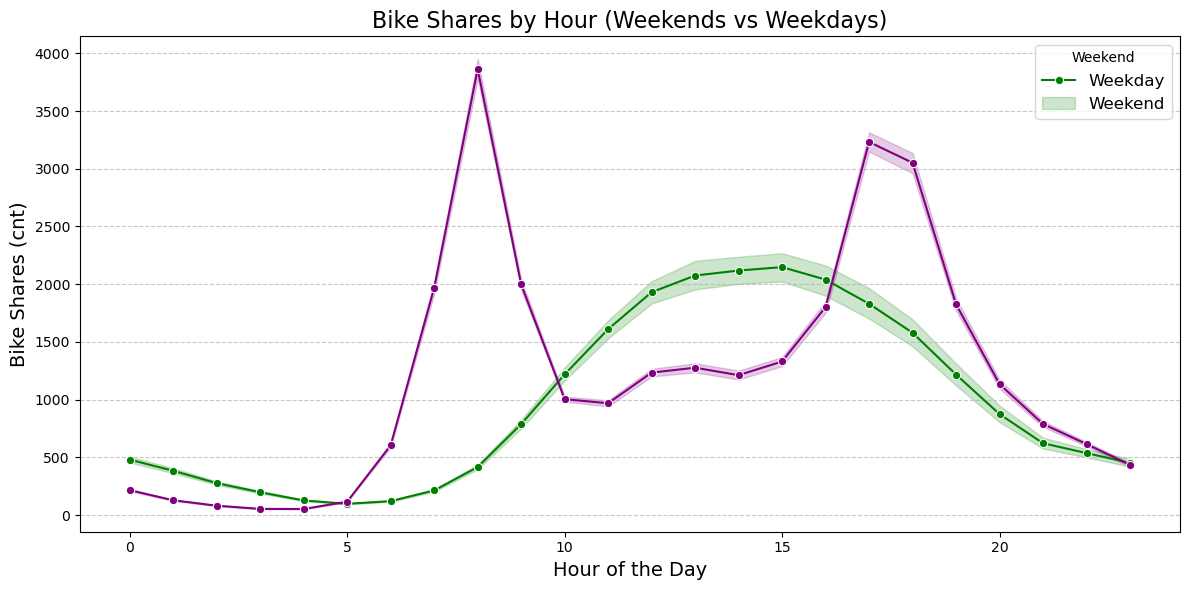

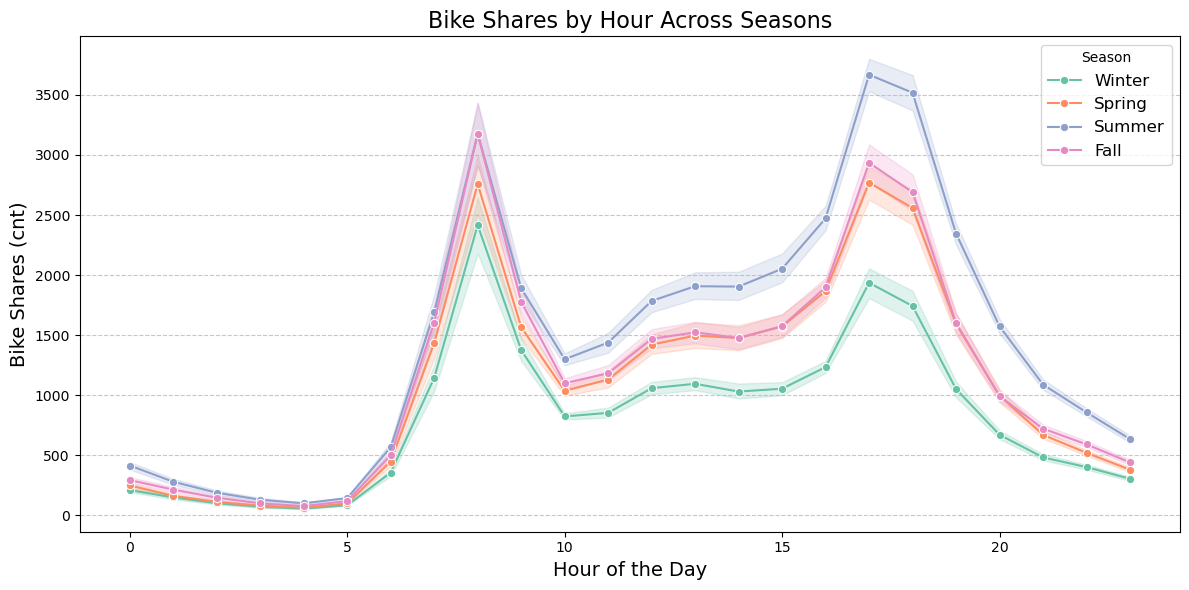

In [82]:


### Plot 1: Bike shares by hour on holidays vs non-holidays
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='cnt', hue='is_holiday', marker='o', palette=['blue', 'orange'])
plt.title('Bike Shares by Hour (Holidays vs Non-Holidays)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.legend(title='Holiday', labels=['Non-Holiday', 'Holiday'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Plot 2: Bike shares by hour on weekends vs weekdays
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='cnt', hue='is_weekend', marker='o', palette=['green', 'purple'])
plt.title('Bike Shares by Hour (Weekends vs Weekdays)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Plot 3: Bike shares by hour across seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='cnt', hue='season', marker='o', palette='Set2')
plt.title('Bike Shares by Hour Across Seasons', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.legend(title='Season', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Bike sharing is highest in spring and summer. Usage is significantly lower in winter. Morning and evening peaks are present in all seasons. Peaks in the morning (07-09) and evening (17-19) on normal days. This corresponds to commuting hours to work/school. On holidays, usage is more balanced throughout the day, peaking around noon.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

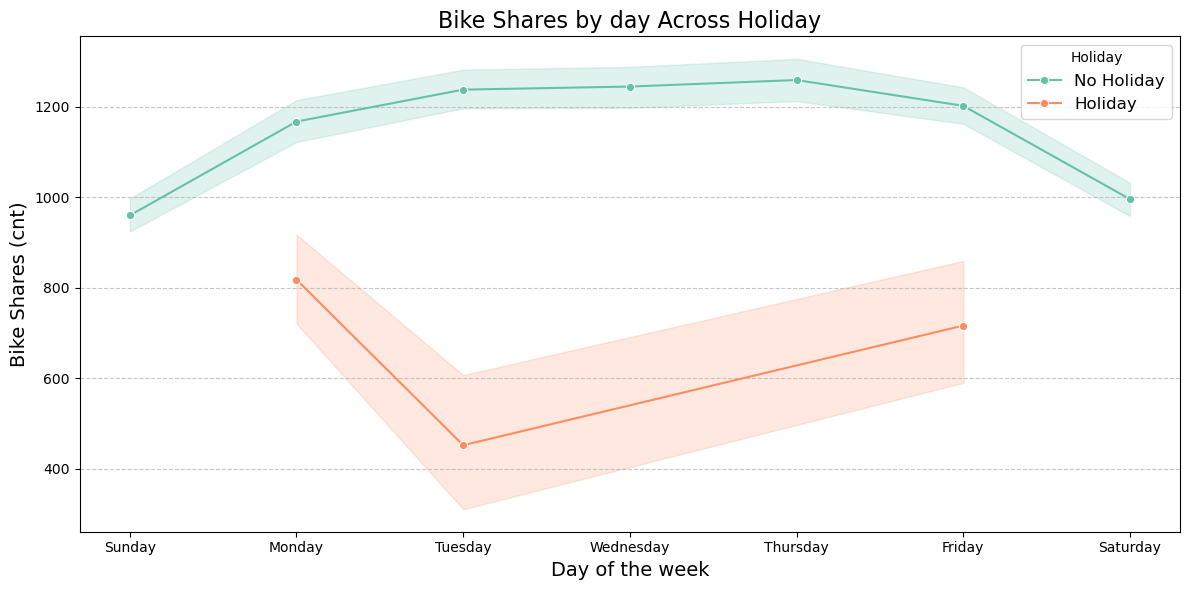

In [86]:
### Plot 3: Bike shares by day of week
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day_name', y='cnt', hue='is_holiday', marker='o', palette='Set2')
plt.title('Bike Shares by day Across Holiday', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.legend(title='Holiday', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cycling is high Monday to Friday, peaking especially on weekdays. On Holidays Cycling is generally lower, but relatively stable over the weekend. There is a marked decrease on holidays on Tuesday. This may be due to a specific holiday period. In general, the number of bike shares on holidays is low, possibly due to reduced commuting to work/school.

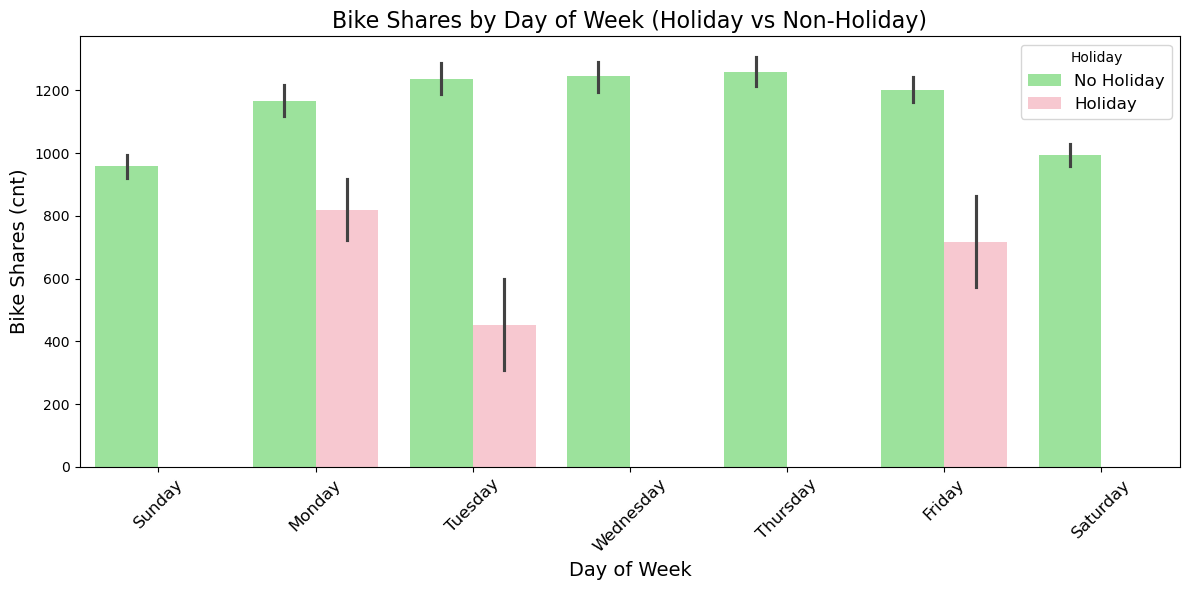

In [91]:
# Plot bike shares by day of week with holiday differentiation
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='day_name', 
    y='cnt', 
    hue='is_holiday', 
    palette=['lightgreen', 'pink']
)
plt.title('Bike Shares by Day of Week (Holiday vs Non-Holiday)', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.legend(title='Holiday', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by day of month

<Figure size 1200x800 with 0 Axes>

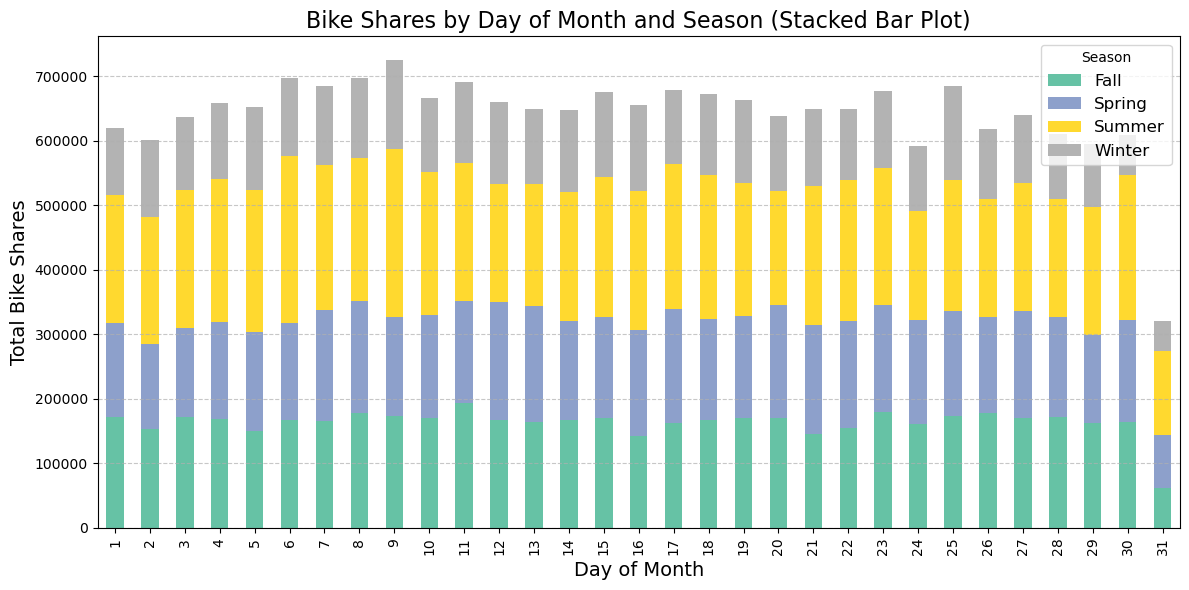

In [94]:
# Group by day of month and season, and calculate total bike shares
grouped = df.groupby(['day_of_month', 'season'])['cnt'].sum().unstack(fill_value=0)

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))
plt.title('Bike Shares by Day of Month and Season (Stacked Bar Plot)', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Total Bike Shares', fontsize=14)
plt.legend(title='Season', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Daily usage rates are generally stable, but may drop on some days, such as the 1st and 31st of the month (possibly due to holidays or special days at the beginning and end of the month).

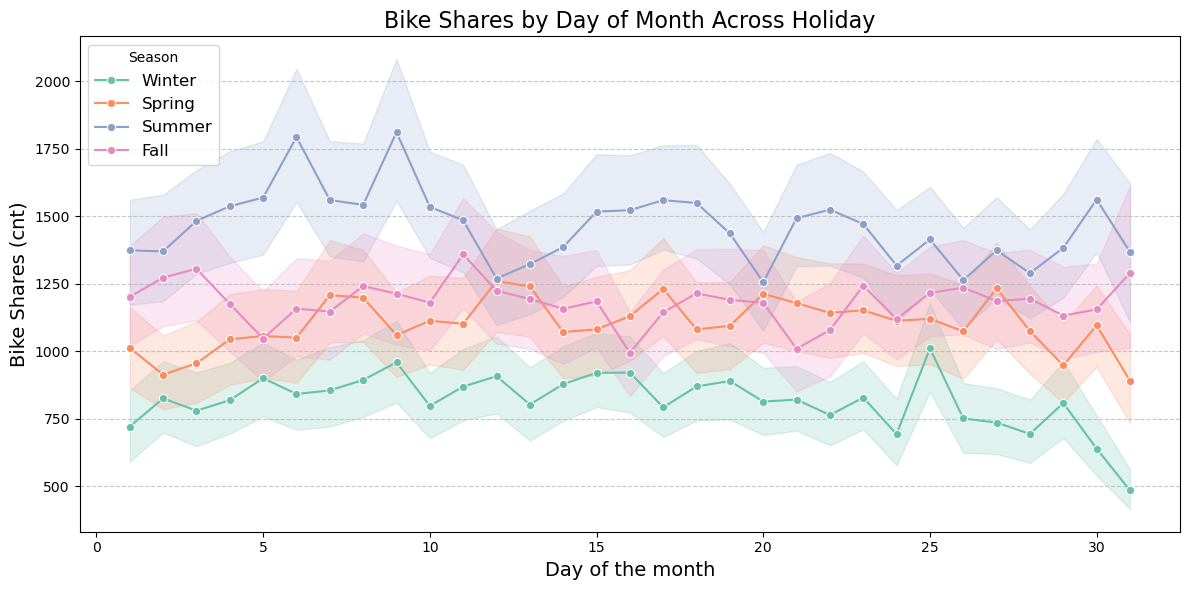

In [99]:
### Plot 3: Bike shares by day of month
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day_of_month', y='cnt', hue='season', marker='o', palette='Set2')
plt.title('Bike Shares by Day of Month Across Holiday', fontsize=16)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Bike Shares (cnt)', fontsize=14)
plt.legend(title='Season', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by year

- Plot bike shares on holidays by seasons

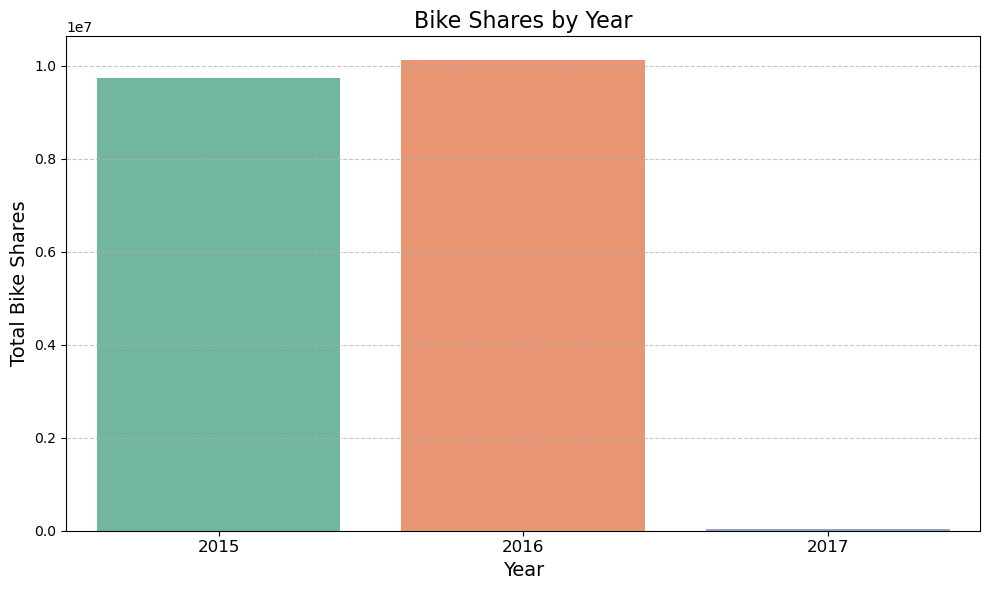

In [102]:
# Group data by year and sum bike shares
yearly_data = df.groupby('year')['cnt'].sum().reset_index()

# Plot bike shares by year
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_data, x='year', y='cnt', palette='Set2')
plt.title('Bike Shares by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Bike Shares', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

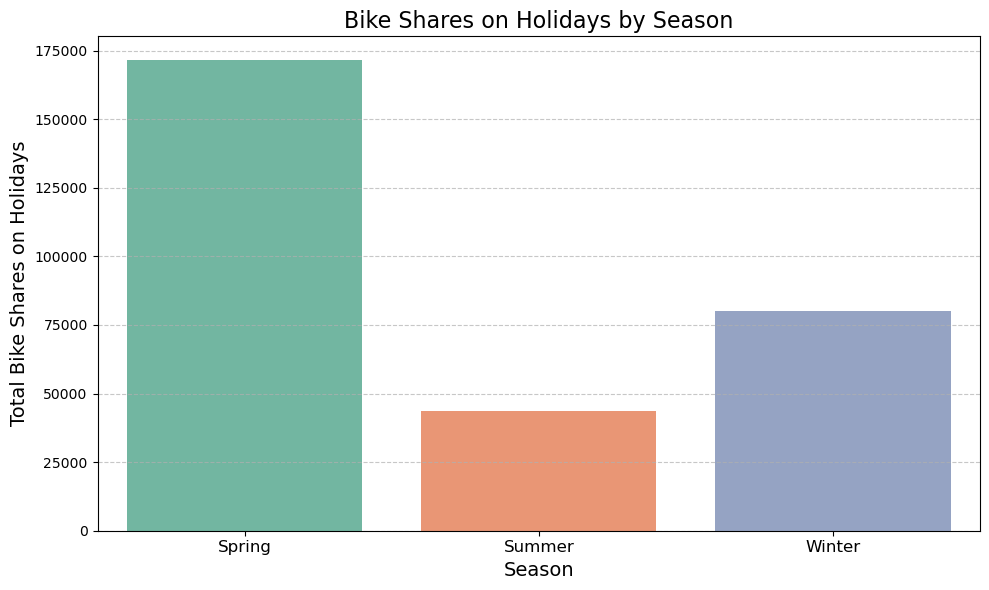

In [104]:
# Filter data for holidays only
holiday_data = df[df['is_holiday'] == "Holiday"]

# Group data by season and sum bike shares
seasonal_data = holiday_data.groupby('season')['cnt'].sum().reset_index()

# Plot bike shares on holidays by season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='season', y='cnt', palette='Set2')
plt.title('Bike Shares on Holidays by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Bike Shares on Holidays', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

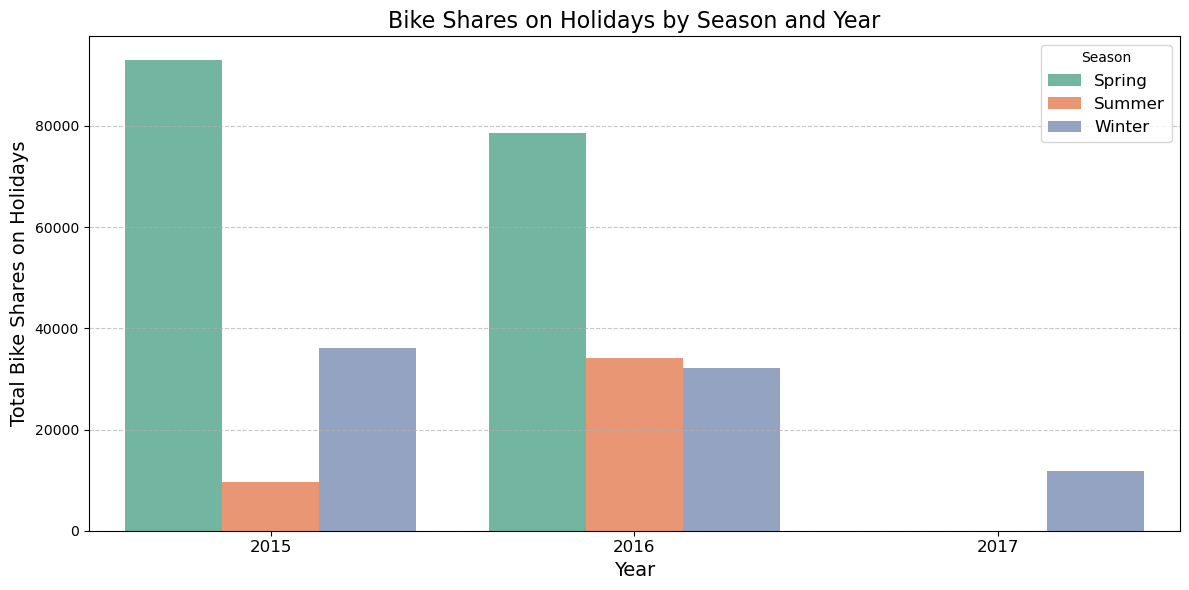

In [668]:
# Group data for holidays by season and year
holiday_data = df[df['is_holiday'] == "Holiday"]
seasonal_data = holiday_data.groupby(['season', 'year'])['cnt'].sum().reset_index()

# Plot bike shares on holidays by season with hue='year'
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_data, x='year', y='cnt', hue='season', palette='Set2')
plt.title('Bike Shares on Holidays by Season and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Bike Shares on Holidays', fontsize=14)
plt.legend(title='Season', fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Bicycle Usage on Holidays by Season
Spring has the highest bicycle usage. Winter has the lowest bicycle usage on holidays. Summer appears lower than expected, suggesting that bicycle usage on holidays during this season might be reduced. The low holiday usage in summer could be due to weather conditions or vacation habits.
Bicycle Usage on Holidays by Year and Season
In 2015 and 2016, bicycle usage on holidays was significantly high during spring. In summer, holiday usage was lower, possibly because people engaged in other activities during their vacations


<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

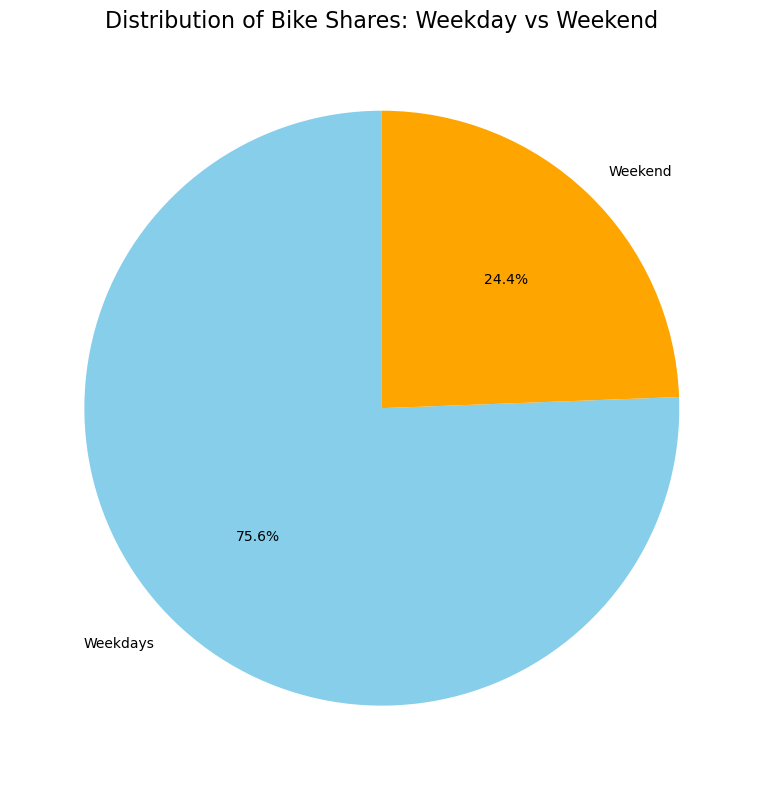

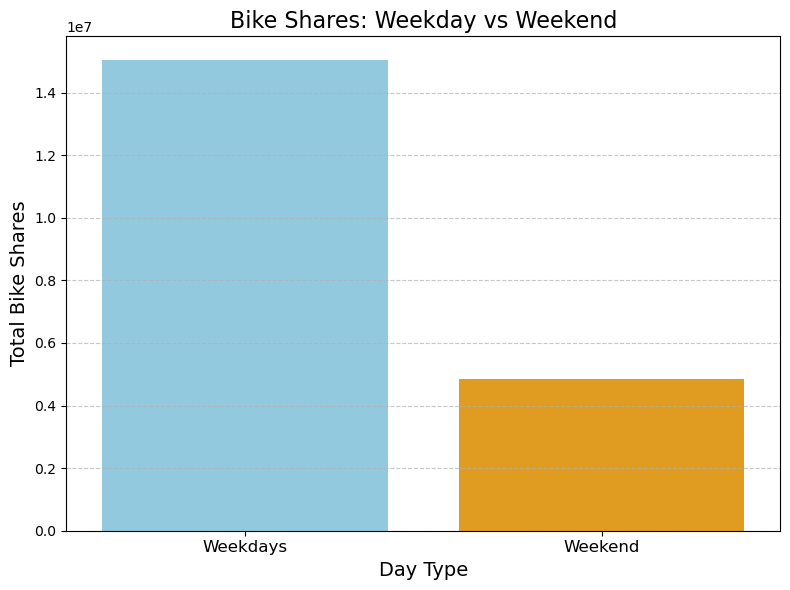

In [108]:
# Group by weekday/weekend and calculate total bike shares
grouped = df.groupby('is_weekend')['cnt'].sum().reset_index()

# Plot 1: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    grouped['cnt'],
    labels=grouped['is_weekend'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange']
)
plt.title('Distribution of Bike Shares: Weekday vs Weekend', fontsize=16)
plt.tight_layout()
plt.show()

# Plot 2: Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='is_weekend', y='cnt', palette=['skyblue', 'orange'])
plt.title('Bike Shares: Weekday vs Weekend', fontsize=16)
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Total Bike Shares', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

In [137]:
from scipy import stats

# Hafta içi ve hafta sonu veri alt kümeleri
weekday_usage = df[df['is_weekend'] == "Weekdays"]['cnt']
weekend_usage = df[df['is_weekend'] == "Weekend"]['cnt']

# Bağımsız iki örneklem t-testi
t_stat, p_value = stats.ttest_ind(weekday_usage, weekend_usage)

# Sonuçları yazdır
print(f"T-istatistiği: {t_stat:.2f}, p-değeri: {p_value:.4f}")

if p_value < 0.05:
    print("Hafta içi ve hafta sonu bisiklet kullanımı arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("Hafta içi ve hafta sonu bisiklet kullanımı arasında anlamlı bir fark yok.")




T-istatistiği: 12.79, p-değeri: 0.0000
Hafta içi ve hafta sonu bisiklet kullanımı arasında istatistiksel olarak anlamlı bir fark var.


Bicycle sharing on weekdays is much higher compared to weekends.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot the distribution of weather code by seasons

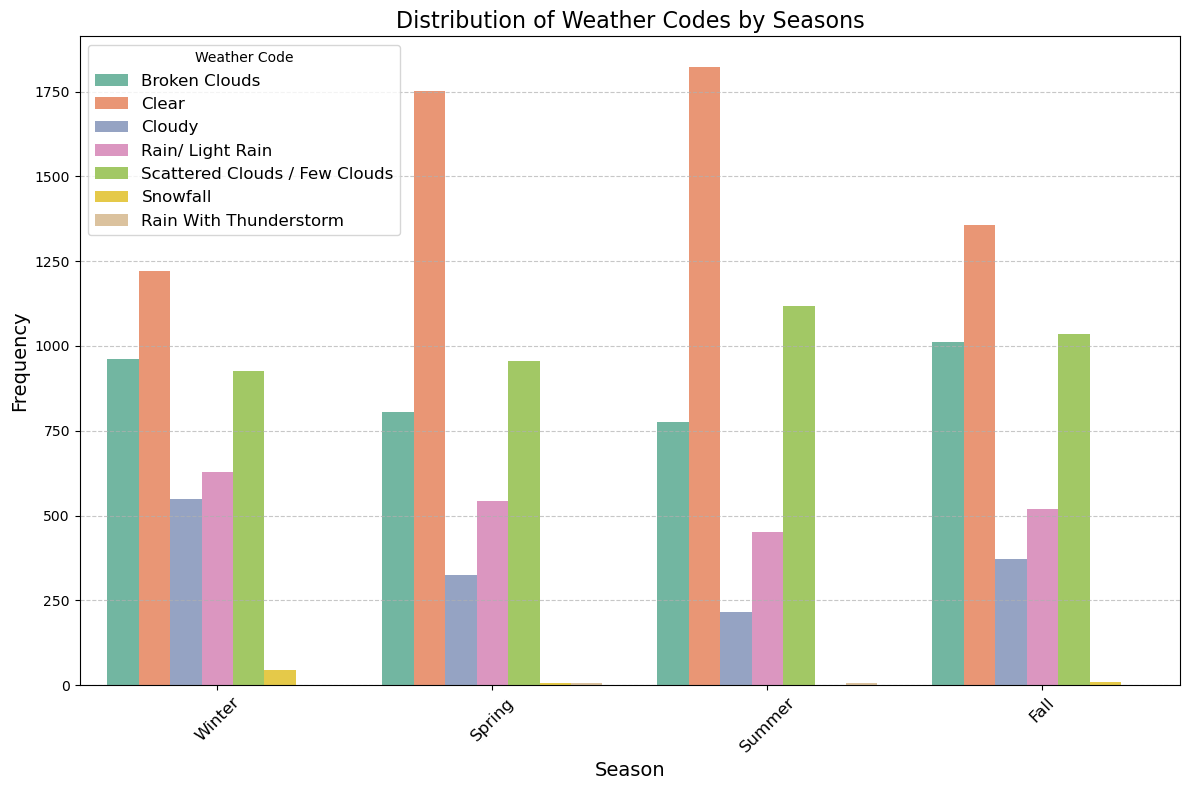

In [112]:
# Group data by season and weather code for distribution
weather_distribution = df.groupby(['season', 'weather_code']).size().unstack(fill_value=0)

# Plot 2: Side-by-Side Bar Plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='season', hue='weather_code', palette='Set2')
plt.title('Distribution of Weather Codes by Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Weather Code', fontsize=12, loc='best')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Clear weather (Orange) is at its highest during summer, indicating that most observations in this season were clear days. Snowfall (Purple) is prominent in winter, but other weather conditions are also evenly distributed. Broken Clouds (Green) are common in both spring and fall.
Rain with Thunderstorm (Red) is more frequently observed in summer.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

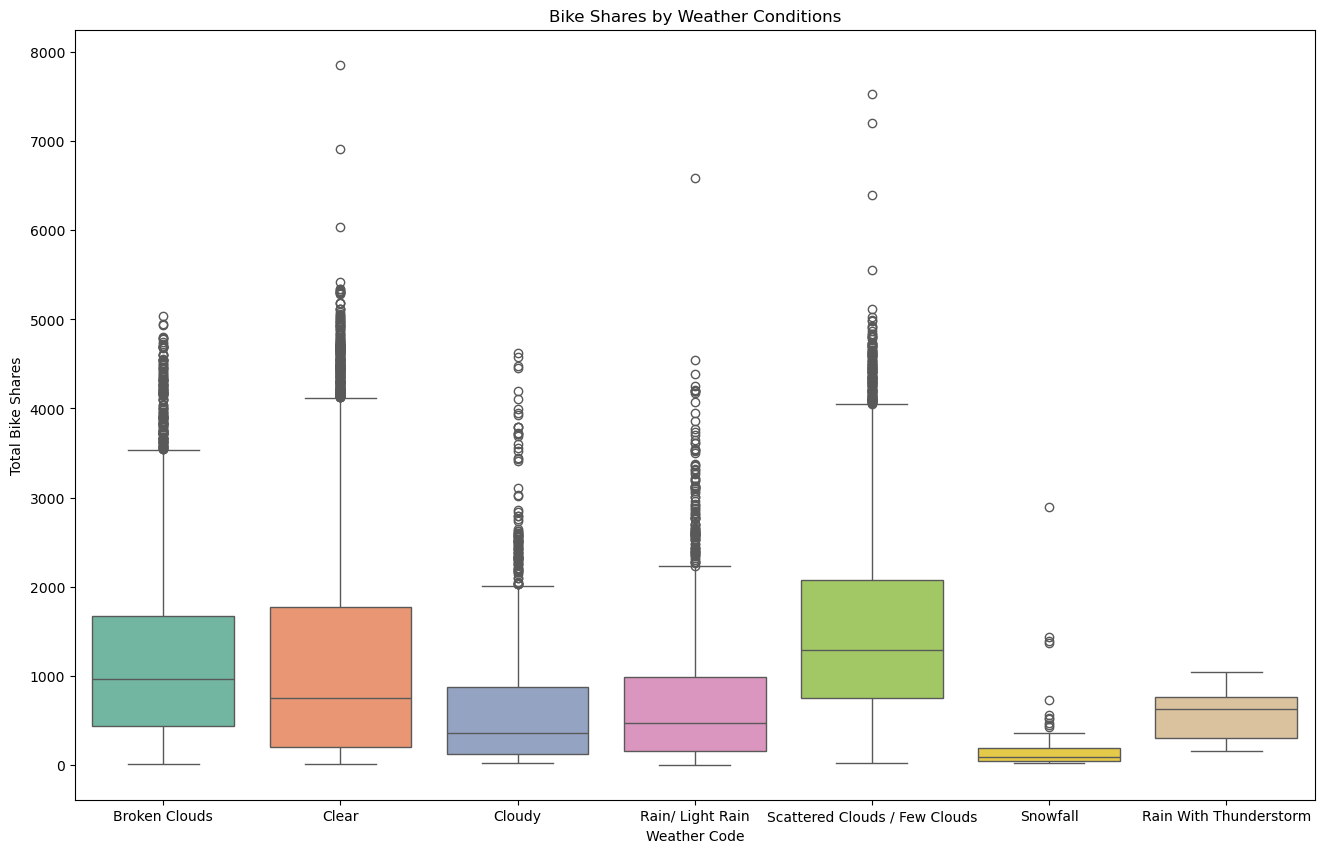

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.boxplot(x='weather_code', y='cnt', data=df, palette='Set2')
plt.title("Bike Shares by Weather Conditions")
plt.xlabel("Weather Code")
plt.ylabel("Total Bike Shares")
plt.show()

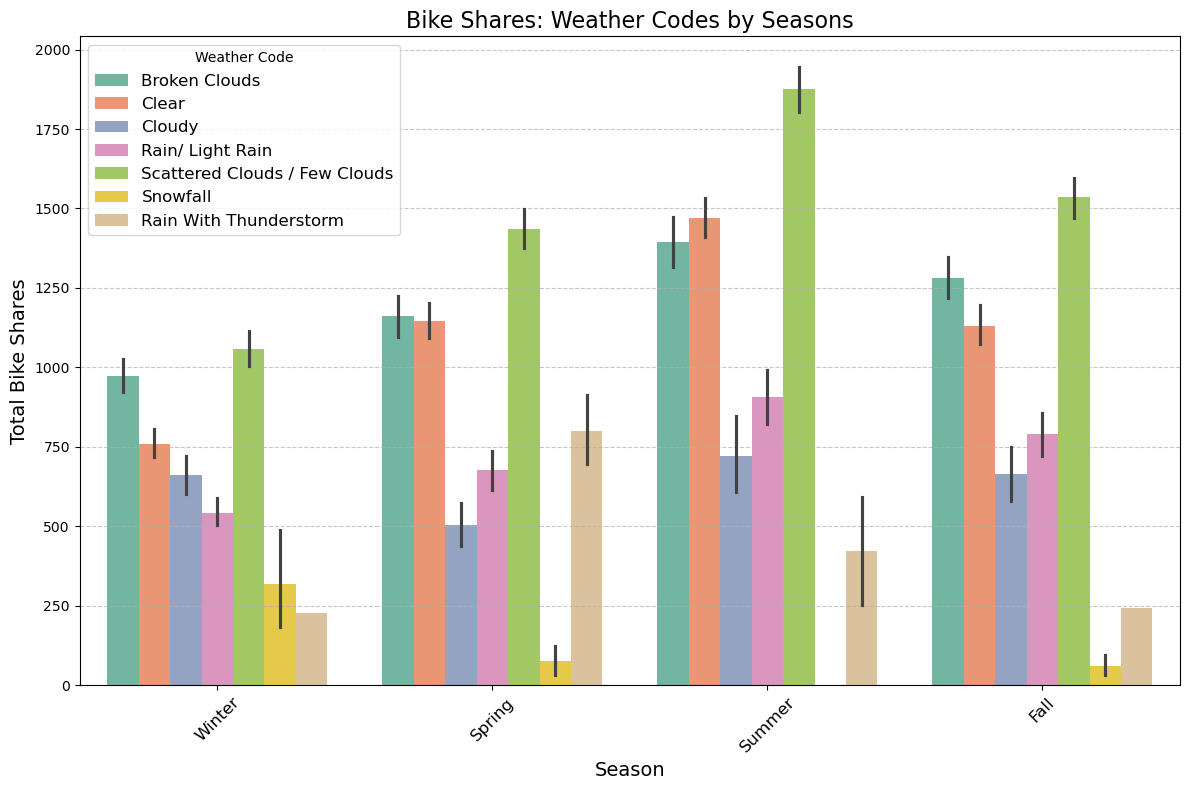

In [114]:
# Group data by season and weather code for distribution
weather_distribution = df.groupby(['season', 'weather_code'])['cnt'].sum().reset_index()

# Plot 2: Side-by-Side Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='season', hue='weather_code',y='cnt', palette='Set2')
plt.title('Bike Shares: Weather Codes by Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Bike Shares', fontsize=14)
plt.legend(title='Weather Code', fontsize=12, loc='best')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Clear weather (Orange) is at its highest during summer, indicating that most observations in this season were clear days. Snowfall (Purple) is prominent in winter, but other weather conditions are also evenly distributed. Broken Clouds (Green) are common in both spring and fall.
Rain with Thunderstorm (Red) is more frequently observed in summer.

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |